<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Удержание клиентов

Данный проект направлен на изучение потока клиентов в банке.

Основная цель предсказать уходимость клиентов, для возможного их удержания.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
random = 12345



выгружаем нужные библиотеки

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

Грузим данные

In [3]:
print(data.info())
print()
print(data.head())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1  

Изучаем данные, на корректность типа данных и повторений

Tenure - есть пустые значения, но пока не уверен корректно ли заменить на 0 или среднее

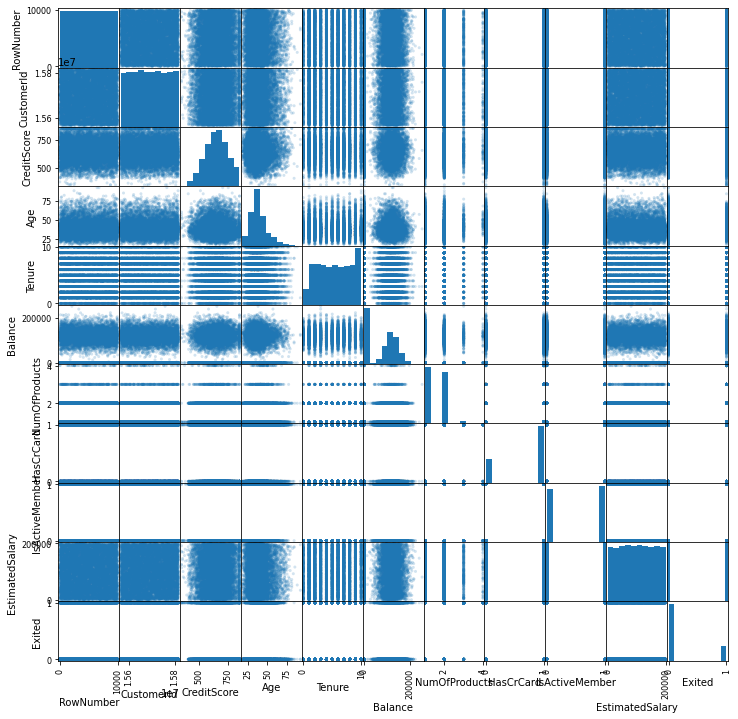

In [4]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize= (12.0, 12.0));

In [5]:
print(data.shape)
data = data.drop_duplicates().dropna()
print(data.shape)

(10000, 14)
(9091, 14)


Есть небольшое количество строчек с пустых данными. Их не заменить ни на 0, ни на среднее по Tenure, поэтому удалим

In [6]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [7]:
data = data.drop(["Surname"], axis=1)
print(data.head())

   RowNumber  CustomerId  CreditScore Geography  Gender  Age  Tenure  \
0          1    15634602          619    France  Female   42     2.0   
1          2    15647311          608     Spain  Female   41     1.0   
2          3    15619304          502    France  Female   42     8.0   
3          4    15701354          699    France  Female   39     1.0   
4          5    15737888          850     Spain  Female   43     2.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  


Убираем не нужные столбцы для OHE

In [8]:
data_ohe = pd.get_dummies(data , drop_first=True)

print(data_ohe.head())

   RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42     2.0       0.00              1   
1          2    15647311          608   41     1.0   83807.86              1   
2          3    15619304          502   42     8.0  159660.80              3   
3          4    15701354          699   39     1.0       0.00              2   
4          5    15737888          850   43     2.0  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0          1               1        101348.88       1                  0   
1          0               1        112542.58       0                  0   
2          1               0        113931.57       1                  0   
3          0               0         93826.63       0                  0   
4          1               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0          

## Исследование задачи

Изучаем данные по критерию

In [9]:
print(data_ohe.pivot(columns = 'Exited').count())

                   Exited
RowNumber          0         7237
                   1         1854
CustomerId         0         7237
                   1         1854
CreditScore        0         7237
                   1         1854
Age                0         7237
                   1         1854
Tenure             0         7237
                   1         1854
Balance            0         7237
                   1         1854
NumOfProducts      0         7237
                   1         1854
HasCrCard          0         7237
                   1         1854
IsActiveMember     0         7237
                   1         1854
EstimatedSalary    0         7237
                   1         1854
Geography_Germany  0         7237
                   1         1854
Geography_Spain    0         7237
                   1         1854
Gender_Male        0         7237
                   1         1854
dtype: int64


<AxesSubplot:>

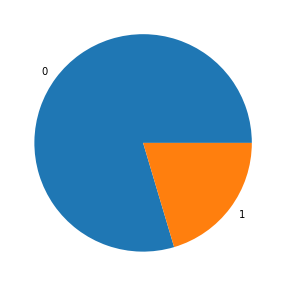

In [10]:
data_ohe_pie = data_ohe.pivot(columns = 'Exited')['Age'].count()
data_ohe_pie.plot.pie(figsize=(5, 5))

Ушло - 2037
Осталось - 7963

In [11]:
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']

Проверим модель с дисбалансом

Сделаем разбивку

In [12]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
features, target, test_size=0.4, random_state=random)
features_valid, features_test, target_valid, target_test = train_test_split(
features_valid_test, target_valid_test, test_size=0.5, random_state=random)
#print(features_upsampled.head(2))

In [13]:
print(features.head(10))

   RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42     2.0       0.00              1   
1          2    15647311          608   41     1.0   83807.86              1   
2          3    15619304          502   42     8.0  159660.80              3   
3          4    15701354          699   39     1.0       0.00              2   
4          5    15737888          850   43     2.0  125510.82              1   
5          6    15574012          645   44     8.0  113755.78              2   
6          7    15592531          822   50     7.0       0.00              2   
7          8    15656148          376   29     4.0  115046.74              4   
8          9    15792365          501   44     4.0  142051.07              2   
9         10    15592389          684   27     2.0  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
0          1               1        101348.88      

In [14]:
numeric = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

scaler = StandardScaler()
scaler.fit(features[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверим несколько моделей

Создаем модель - LogisticRegression

In [15]:
model = LogisticRegression(random_state=random, solver='liblinear') 
model.fit(features_train, target_train) 

predicted_valid = model.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.3055555555555556
0.7737903055091789


Вывод. При дисбалансе классов, метрика F1 очень низкая, поэтому необходимо обучить модель на равноценных данных


Создаем модель - DecisionTreeClassifier

In [16]:
f1_score_best_dtc = 0.0

for depth in range(1,30,1):
    model_dtc = DecisionTreeClassifier( max_depth=depth, random_state=random)
    model_dtc.fit(features_train, target_train) 
    predicted_valid = model_dtc.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > f1_score_best_dtc:
        f1_score_best_dtc = f1_score(target_valid, predicted_valid)

    
print(f1_score_best_dtc)

probabilities_valid = model_dtc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.5800316957210777
0.6791693434230943


DecisionTreeClassifier даже на насбалансированой выборке дает более высокий результат, но недостаточный. 

Модель - RandomForestClassifier

In [17]:
f1_score_best_rfc = 0.0

for est in range(1, 25):
    for depth in range(1, 30, 1):
        model_rfc = RandomForestClassifier(random_state=random, n_estimators=est, max_depth=depth)
        model_rfc.fit(features_train,target_train)
        predicted_valid = model_rfc.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > f1_score_best_rfc:
            f1_score_best_rfc = f1_score(target_valid, predicted_valid)

    
print(f1_score_best_rfc)

probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.6032786885245902
0.8456080639549974


RandomForestClassifier даже на несбалансированой выборке дает хороший результат

## Борьба с дисбалансом

Создадим функцию, для баланса классов

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled


features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, 4)

Проверим баланс

In [19]:
print(target_upsampled_train.value_counts())

1    4504
0    4328
Name: Exited, dtype: int64


Баланс около 50/50

Разделим выборку

LogisticRegression - Метод upsample

In [20]:
model_lr_upsample = LogisticRegression(random_state=random, solver='liblinear') 
model_lr_upsample.fit(features_upsampled_train, target_upsampled_train) 

predicted_valid = model_lr_upsample.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

probabilities_valid = model_lr_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.5063752276867031
0.7782246708279874


Данный метод не достаточен. Нужно более высокое значение метрики F1

LogisticRegression - Метод class_weight = 'balanced'

In [21]:
model_lr_balanced = LogisticRegression(random_state=random, solver='liblinear', class_weight = 'balanced') 
model_lr_balanced.fit(features_train, target_train) 

predicted_valid = model_lr_balanced.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

probabilities_valid = model_lr_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.5102420856610802
0.7781565630999693


Данный метод не достаточен. Нужно более высокое значение метрики F1

DecisionTreeClassifier - Метод class_weight = 'balanced'DecisionTreeClassifier

In [22]:
f1_score_best_balanced = 0.0

for depth in range(1,30,1):
    model_dtc_balanced = DecisionTreeClassifier( max_depth=depth, random_state=random, class_weight = 'balanced')
    model_dtc_balanced.fit(features_train, target_train) 
    predicted_valid = model_dtc_balanced.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > f1_score_best_balanced:
        f1_score_best_balanced = f1_score(target_valid, predicted_valid)

    
print(f1_score_best_balanced)

probabilities_valid = model_dtc_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.5705196182396607
0.679431650213435


Данный метод не достаточен. Нужно более высокое значение метрики F1

DecisionTreeClassifier - Метод upsample

In [23]:
f1_score_best_upsample = 0.0

for depth in range(1,30,1):
    model_dtc_upsample = DecisionTreeClassifier( max_depth=depth, random_state=random)
    model_dtc_upsample.fit(features_upsampled_train, target_upsampled_train) 
    predicted_valid = model_dtc_upsample.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > f1_score_best_upsample:
        f1_score_best_upsample = f1_score(target_valid, predicted_valid)

    
print(f1_score_best_upsample)

probabilities_valid = model_dtc_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.5705196182396607
0.6621902709030901


Данный метод не достаточен. Нужно более высокое значение метрики F1

RandomForestClassifier - Метод class_weight = 'balanced'

In [24]:
f1_score_best_rfc_balanced = 0.0
best_model_rfc_balanced = None

for est in range(1, 25):
    for depth in range(1, 30, 1):
        model_rfc_balanced = RandomForestClassifier(random_state=random, n_estimators=est, max_depth=depth, class_weight = 'balanced')
        model_rfc_balanced.fit(features_train,target_train)
        predicted_valid = model_rfc_balanced.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > f1_score_best_rfc_balanced:
            f1_score_best_rfc_balanced = f1_score(target_valid, predicted_valid)
            best_model_rfc_balanced = model_rfc_balanced

    
print(f1_score_best_rfc_balanced)

probabilities_valid = model_rfc_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.6331658291457286
0.8537524597013936


Результат хороший

RandomForestClassifier - Метод upsample

In [25]:
f1_score_best_rfc_upsample = 0.0
best_model_rfc_upsample = None

for est in range(1, 25):
    for depth in range(1, 30, 1):
        model_rfc_upsample = RandomForestClassifier(random_state=random, n_estimators=est, max_depth=depth)
        model_rfc_upsample.fit(features_upsampled_train, target_upsampled_train)
        predicted_valid = model_rfc_upsample.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > f1_score_best_rfc_upsample:
            f1_score_best_rfc_upsample = f1_score(target_valid, predicted_valid)
            best_model_rfc_upsample = model_rfc_upsample

    
print(f1_score_best_rfc_upsample)

probabilities_valid = model_rfc_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.6276150627615062
0.8530704620465084


Результат хороший

## Тестирование модели

Посмотриим 2 модели с наивысшим результатом

In [26]:
predicted_test = best_model_rfc_balanced.predict(features_test)

print(f1_score(target_test, predicted_test))

probabilities_test = best_model_rfc_balanced.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.5928961748633879
0.8547435509288371


На тестовой выборке результат не достиг нужный результатов


In [27]:
predicted_test = best_model_rfc_upsample.predict(features_test)

print(f1_score(target_test, predicted_test))

probabilities_test = best_model_rfc_upsample.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.6005830903790087
0.8419550602793111


Модель показала нужный результат корректности

При изменении баланса классов модель начала лучше воспринимать классы и качество ее увеличилось до необходимых значений.

Данный проект был направлен на разработку модели, которая будет прогнозировать уход клиентов из банка. Основная цель сосредоточиться на старых клиентах для их удержания. 

Во время тестов использовали 3 основных модели для теста.
Так как выборка была не равнозначна по классам, то балансировали их для получение более точных прогнозов.
Наиболее удачной оказалась модель RandomForestClassification с методом ручного баланса классов. 
Показатель данный модели по метрике F1 оказался выше 0.60